This version of solving digit recognition problem using MNIST dataset is implemented using keras. Two models are considered: simple multi-layer neural network and convolutional neural network.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils

np.random.seed(1)
plt.rcParams['figure.figsize'] = 8, 6

## Load data

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).


In [2]:
train = pd.read_csv('../data/digit-recognizer/train.csv')
test = pd.read_csv('../data/digit-recognizer/test.csv')

## Data preprocessing

Data preprocessing would include:
* Normalize the data (numeric values are rescaled in order to have values between 0 and 1)
* Split the dataset on train and validation datasets
* Represent target value as zero vector with the length equals to the number of categories and "1" value on a position corresponding to a target value, i.e. target value "4" will be threated as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0] vector. This is an important step because predicting "7" instead of real target value "8" is not better than predicting "0", both predictions are wrong

In [3]:
test_normalized = test.values.astype('float32')
test_normalized /= 255

X = train.iloc[:, 1:].values.astype('float32')
X /= 255
y = utils.to_categorical(train.iloc[:, 0])

## Build a model


### Simple multi-layer neural network


In [19]:
num_pixels = 784
batch_size = 64
epochs = 20
hidden_layer_size = 32
num_classes = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

def create_simple_nn_model():
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_simple_nn_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                    batch_size=batch_size, verbose=2)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Simple NN, accuracy on test set: {accuracy*100:.2f}%")


Train on 37800 samples, validate on 4200 samples
Epoch 1/20
 - 3s - loss: 9.1662 - acc: 0.3631 - val_loss: 5.0579 - val_acc: 0.5990
Epoch 2/20
 - 3s - loss: 3.4080 - acc: 0.7057 - val_loss: 2.3929 - val_acc: 0.7710
Epoch 3/20
 - 3s - loss: 2.0116 - acc: 0.8057 - val_loss: 1.7569 - val_acc: 0.8243
Epoch 4/20
 - 3s - loss: 1.5557 - acc: 0.8445 - val_loss: 1.4458 - val_acc: 0.8507
Epoch 5/20
 - 3s - loss: 1.3088 - acc: 0.8660 - val_loss: 1.2626 - val_acc: 0.8669
Epoch 6/20
 - 3s - loss: 1.1372 - acc: 0.8784 - val_loss: 1.1300 - val_acc: 0.8812
Epoch 7/20
 - 3s - loss: 1.0067 - acc: 0.8913 - val_loss: 1.0342 - val_acc: 0.8893
Epoch 8/20
 - 3s - loss: 0.9064 - acc: 0.8982 - val_loss: 0.9406 - val_acc: 0.8983
Epoch 9/20
 - 3s - loss: 0.8169 - acc: 0.9060 - val_loss: 0.8819 - val_acc: 0.9045
Epoch 10/20
 - 3s - loss: 0.7427 - acc: 0.9112 - val_loss: 0.8293 - val_acc: 0.9100
Epoch 11/20
 - 3s - loss: 0.6813 - acc: 0.9172 - val_loss: 0.7838 - val_acc: 0.9107
Epoch 12/20
 - 3s - loss: 0.6270 - a

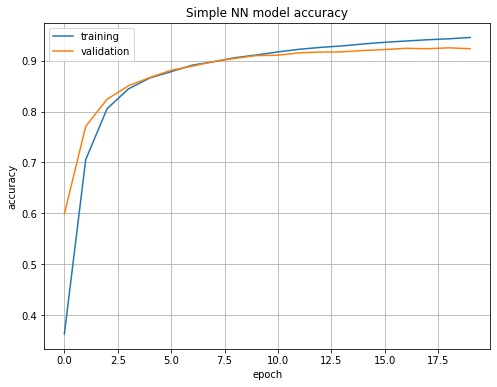

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Simple NN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.grid()
plt.show()

### Simple convolutional neural network


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
# reshape in order to have [samples][width][height][channels] shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [43]:
batch_size = 200
epochs = 10

def create_conv_nn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_model = create_conv_nn_model()
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Convolutional NN, accuracy on test set: {accuracy*100:.2f}%")

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================]37800/37800 [==============================] - 47s 1ms/step - loss: 0.3120 - acc: 0.9136 - val_loss: 0.1024 - val_acc: 0.9721

Epoch 2/10
37800/37800 [==============================]37800/37800 [==============================] - 44s 1ms/step - loss: 0.0877 - acc: 0.9745 - val_loss: 0.0669 - val_acc: 0.9798

Epoch 3/10
37800/37800 [==============================]37800/37800 [==============================] - 46s 1ms/step - loss: 0.0584 - acc: 0.9832 - val_loss: 0.0597 - val_acc: 0.9812

Epoch 4/10
37800/37800 [==============================]37800/37800 [==============================] - 46s 1ms/step - loss: 0.0466 - acc: 0.9852 - val_loss: 0.0565 - val_acc: 0.9821

Epoch 5/10
37800/37800 [==============================]37800/37800 [==============================] - 45s 1ms/step - loss: 0.0375 - acc: 0.9885 - val_loss: 0.0552 - val_acc: 0.9819

Epoch 6/10
37800/37800 [=================

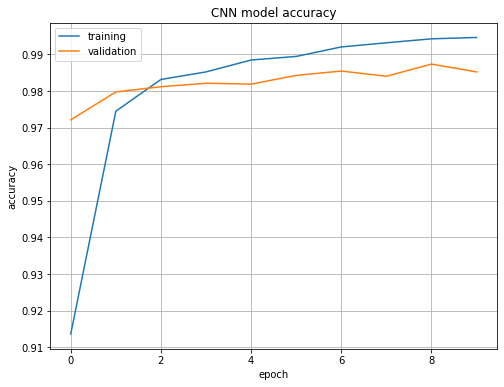

In [44]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.grid()
plt.show()

## Submit the prediction

In [16]:
output = model.predict(test_normalized)
prediction = np.argmax(output, axis=1)
submission = pd.DataFrame({
    "ImageId": list(range(1, test.shape[0]+1)),
    "Label": prediction
})
submission.to_csv("../data/digit-recognizer/digit-recognizer-submission.csv", index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
